# Two-way ANOVA Tutorial with Python

Question:
For the data provided regarding a research scenario where the body mass index (BMI) of newly diagnosed diabetes patients is analyzed in relation to their age group (AGE_GR) and education level (EDU). The questions are as follows:

a) A description of the statistical analysis strategy, including the steps and justifications for specific strategies.
b) Instructions to run the analysis and provide key computer outputs.
c) A request to state if the BMI is simultaneously associated with age group and education level, with supporting evidence.
d) If applicable, a prompt to identify specific age groups between which the average BMI differed significantly, along with the evidence for these differences.

In [8]:
#Installing the necessary libraries
!pip install pandas
!pip install statsmodels
!pip install scipy
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install xlrd


  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [57]:
# Importing the necessary libraries
#import dataset
import pandas as pd
import numpy as np

# Load the data
data = pd.read_stata ("C:/Users/DollarBill/Downloads/dataset_anova.dta")

# Display the first few rows of the dataframe
data.head()
#summary of the data
data.describe()

,AGEYRS,BMI
count,424.000000,424.000000
mean,53.021226,26.287110
std,9.775592,7.080303
min,30.000000,14.545455
25%,47.000000,22.133117
50%,53.000000,25.558358
75%,60.000000,29.094282
max,75.000000,89.998548


In [22]:
#list missing values
data.isnull().sum()


AGEYRS    0
SEX       0
BMI       0
HYPER     0
EMPLOY    0
EDU       1
AGE_GR    0
dtype: int64

In [23]:
#create a new column before AGEYRS for ID
data['ID_1'] = range(1, len(data) + 1)
data.head()

,AGEYRS,SEX,BMI,HYPER,EMPLOY,EDU,AGE_GR,ID_1
0,51,Female,18.870663,Normal blood pressure,self employed,Grade 1-7,46-60,1
1,68,Male,17.525016,High blood pressure,Peasant farmer,None,>60,2
2,38,Male,25.580012,Normal blood pressure,Peasant farmer,None,30-45,3
3,50,Male,26.938212,High blood pressure,Peasant farmer,Grade 1-7,46-60,4
4,51,Female,27.550905,Normal blood pressure,Peasant farmer,Grade 1-7,46-60,5


In [24]:
data.insert(0, 'ID', range(1, len(data) + 1))
data.head()

,ID,AGEYRS,SEX,BMI,HYPER,EMPLOY,EDU,AGE_GR,ID_1
0,1,51,Female,18.870663,Normal blood pressure,self employed,Grade 1-7,46-60,1
1,2,68,Male,17.525016,High blood pressure,Peasant farmer,None,>60,2
2,3,38,Male,25.580012,Normal blood pressure,Peasant farmer,None,30-45,3
3,4,50,Male,26.938212,High blood pressure,Peasant farmer,Grade 1-7,46-60,4
4,5,51,Female,27.550905,Normal blood pressure,Peasant farmer,Grade 1-7,46-60,5


In [28]:
#list the ID with missing values
data[data['EDU'].isnull()]


,ID,AGEYRS,SEX,BMI,HYPER,EMPLOY,EDU,AGE_GR,ID_1
37,38,54,Male,28.672626,High blood pressure,Unemployed,NaN,46-60,38


In [ ]:
missing_Edu = data[data['EDU'].isna()]
missing_Edu_IDs = missing_Edu['ID'].tolist()
missing_Edu_IDs


In [32]:
missing_edu_ids = data[data['EDU'].isna()]['ID'].tolist()
missing_edu_ids

[38]

Lets go ahead and run a two-way ANOVA to test the association between BMI, age group, and education level

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Conduct a two-way ANOVA
# The formula for our two-way ANOVA
formula = 'BMI ~ C(AGE_GR) + C(EDU) + C(AGE_GR):C(EDU)'

# Fit the ANOVA model
anova_model = ols(formula, data=data).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(anova_model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(AGE_GR),857.972761,2.0,8.906135,0.000163
C(EDU),65.635126,2.0,0.681322,0.506514
C(AGE_GR):C(EDU),281.647617,4.0,1.461813,0.212973
Residual,19941.350330,414.0,NaN,NaN


Testing assumptions
1. Normality of residuals with Shapiro-Wilk test
2. Homogeneity of variances with Levene's test

In [42]:
# Test for Normality of residuals
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns


# Fit the model
model = ols('BMI ~ C(AGE_GR) + C(EDU) + C(AGE_GR):C(EDU)', data=data).fit()

# Test for Homogeneity of variances (Levene's test)
_, pvalue_levene = stats.levene(data['BMI'][data['AGE_GR'] == '30-45'],
                                data['BMI'][data['AGE_GR'] == '46-60'],
                                data['BMI'][data['AGE_GR'] == '>60'])
print(f"Levene's test p-value: {pvalue_levene.round(3)}")

# Test for Normality (Shapiro-Wilk test)
_, pvalue_shapiro = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test p-value: {pvalue_shapiro}")

pvalue_shapiro_round = round(pvalue_shapiro, 5)
pvalue_shapiro_round

# If the dataset is too large for Shapiro-Wilk test,


Levene's test p-value: 0.667
Shapiro-Wilk test p-value: 1.9560309875773067e-22


0.0

we can visualize normality with Q-Q plots
we can also visualize the distribution of residuals to check for normality
we can also look at the box plots for outliers

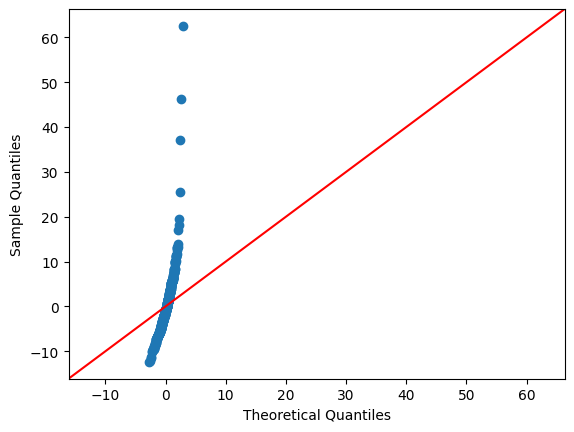

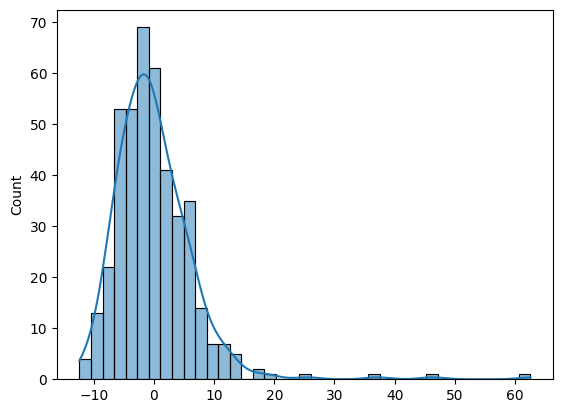

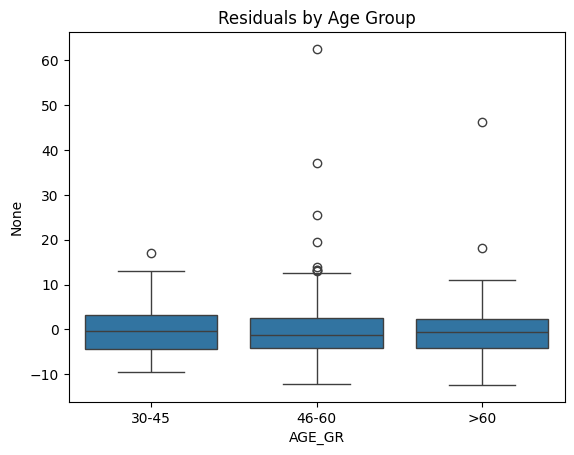

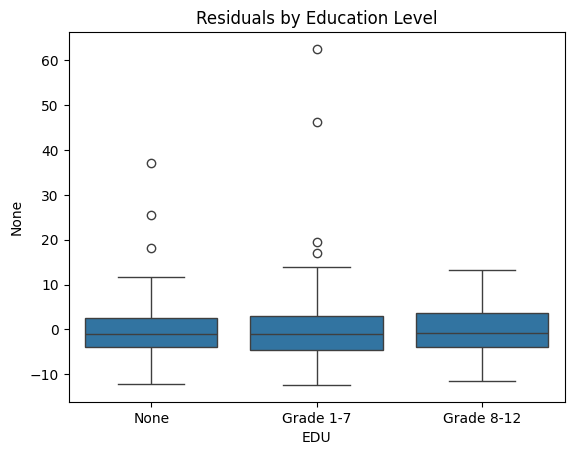

In [43]:
# we can visualize normality with Q-Q plots
sm.qqplot(model.resid, line ='45')
plt.show()

# Visualize the distribution of residuals to check for normality
sns.histplot(model.resid, kde=True)
plt.show()

# For a more graphical approach, we can plot the residuals
sns.boxplot(x='AGE_GR', y=model.resid, data=data)
plt.title('Residuals by Age Group')
plt.show()

sns.boxplot(x='EDU', y=model.resid, data=data)
plt.title('Residuals by Education Level')
plt.show()


We can make data normally distributed through
1. Log Transformation: This is one of the most common transformations and can be used if the data are right-skewed.
2. Square Root Transformation: This can be useful for data where variance is proportional to the mean and the data are right-skewed.
3. Box-Cox Transformation: This is a family of power transformations that includes both the log and the square root transformations as special cases. It's useful when you're not sure which transformation to use as it can determine the best power transformation to reduce skewness.
4. Inverse Transformation: This may be effective for data that follow an inverse distribution.
5. Arcsine Transformation: Often used for proportions or percentages data.

For this case we are going to do a log transformation on BMI and check for normality again

In [46]:
# Apply log transformation to BMI to correct for skewness
# Adding a small constant to avoid taking log of zero if there are any zero BMI values
data['BMI_log'] = np.log(data['BMI'] + 0.01)

# Fit the model with the transformed BMI
model_log = ols('BMI_log ~ C(AGE_GR) + C(EDU)', data=data).fit()

# Perform ANOVA on the transformed data
anova_results_log = sm.stats.anova_lm(model_log, typ=2)

# Check for homogeneity of variances (Levene's test)
levene_test_log = stats.levene(data['BMI_log'][data['AGE_GR'] == '30-45'],
                               data['BMI_log'][data['AGE_GR'] == '46-60'],
                               data['BMI_log'][data['AGE_GR'] == '>60'])

# Check for normality of residuals (Shapiro-Wilk test)
shapiro_test_log = stats.shapiro(model_log.resid)

# Display the results
anova_results_log, levene_test_log, shapiro_test_log


(              sum_sq     df          F    PR(>F)
 C(AGE_GR)   1.247022    2.0  12.132507  0.000008
 C(EDU)      0.071101    2.0   0.691754  0.501269
 Residual   21.481754  418.0        NaN       NaN,
 LeveneResult(statistic=0.7735707890921812, pvalue=0.46201733993796623),
 ShapiroResult(statistic=0.965446913240563, pvalue=1.972214205490811e-08))

After long transformation, we can see that data is not yet normally distributed. This could be as a result of outliers. So lets remove the outliers and check for normality again

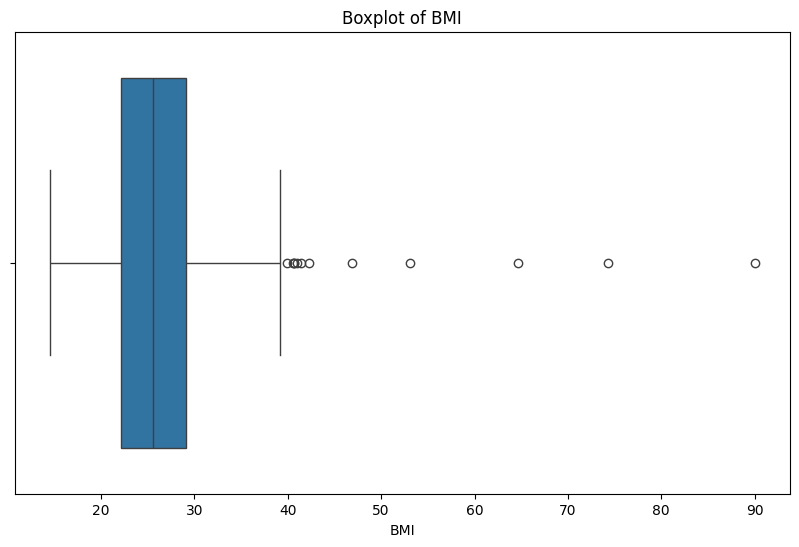

(count    12.000000
 mean     51.269551
 std      16.470007
 min      39.943914
 25%      40.663740
 50%      41.810099
 75%      56.001159
 max      89.998548
 Name: BMI, dtype: float64,
      AGEYRS     SEX        BMI         EDU AGE_GR
 19       71    Male  42.222222        None    >60
 31       55  Female  41.397975   Grade 1-7  46-60
 102      58    Male  46.826223   Grade 1-7  46-60
 149      60    Male  53.116488        None  46-60
 175      44    Male  40.970641   Grade 1-7  30-45
 206      59  Female  40.559488   Grade 1-7  46-60
 266      46    Male  64.655172        None  46-60
 268      51    Male  40.625000  Grade 8-12  46-60
 274      65  Female  74.242292   Grade 1-7    >60
 286      55  Female  39.943914  Grade 8-12  46-60
 307      55  Female  89.998548   Grade 1-7  46-60
 389      59  Female  40.676653  Grade 8-12  46-60)

In [47]:
# Calculate IQR
Q1 = data['BMI'].quantile(0.25)
Q3 = data['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers using the IQR method
outliers = data[(data['BMI'] < (Q1 - 1.5 * IQR)) | (data['BMI'] > (Q3 + 1.5 * IQR))]

# Plot a boxplot for BMI
plt.figure(figsize=(10,6))
sns.boxplot(x=data['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')
plt.show()

# Display the potential outliers
outliers['BMI'].describe(), outliers[['AGEYRS', 'SEX', 'BMI', 'EDU', 'AGE_GR']]

Now we can exclude the outliers from the dataset and check for normality again

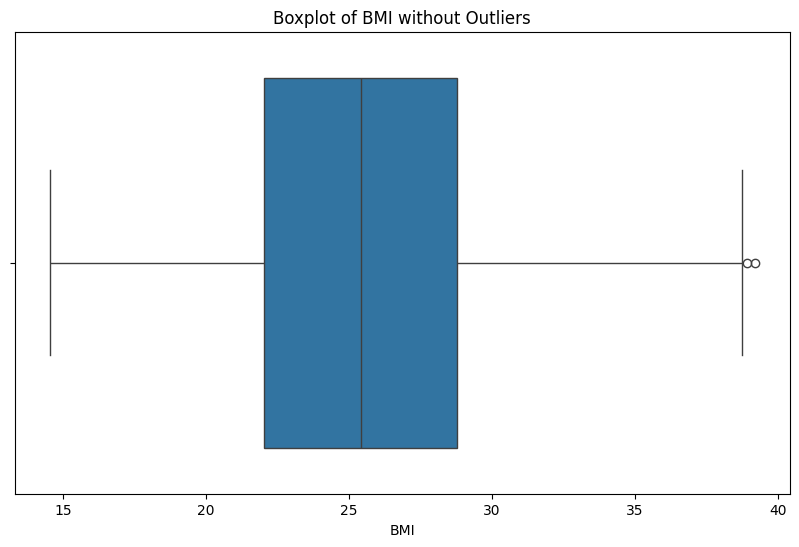

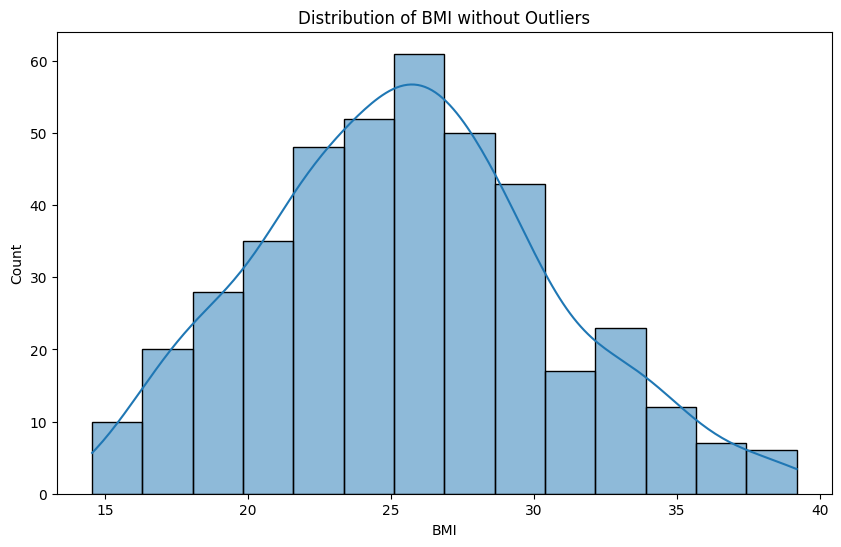

In [48]:
# Exclude the outliers from the dataset
data_no_outliers = data[~data.index.isin(outliers.index)]

# Check for normality of BMI without outliers (Shapiro-Wilk test)
shapiro_test_no_outliers = stats.shapiro(data_no_outliers['BMI'])

# Display the result of the Shapiro-Wilk test
shapiro_test_no_outliers

# Plot a boxplot for BMI without outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers['BMI'])
plt.title('Boxplot of BMI without Outliers')
plt.xlabel('BMI')
plt.show()

# Visualize the distribution of BMI without outliers
plt.figure(figsize=(10,6))
sns.histplot(data_no_outliers['BMI'], kde=True)
plt.title('Distribution of BMI without Outliers')
plt.xlabel('BMI')
plt.show()


We can see that the data is still not normally distributed. We can apply a log transformation to BMI and check for normality again

In [49]:
# Apply log transformation to BMI to correct for skewness in the data without outliers
# Adding a small constant to avoid taking log of zero if there are any zero BMI values
data_no_outliers['BMI_log'] = np.log(data_no_outliers['BMI'] + 0.01)

# Re-run Shapiro-Wilk test for normality on log-transformed BMI data
shapiro_test_log_no_outliers = stats.shapiro(data_no_outliers['BMI_log'])

# Re-run Levene's test for homogeneity of variances on log-transformed BMI data
levene_test_log_no_outliers = stats.levene(
    data_no_outliers['BMI_log'][data_no_outliers['AGE_GR'] == '30-45'],
    data_no_outliers['BMI_log'][data_no_outliers['AGE_GR'] == '46-60'],
    data_no_outliers['BMI_log'][data_no_outliers['AGE_GR'] == '>60']
)

# Display the results
shapiro_test_log_no_outliers, levene_test_log_no_outliers


C:\Users\DollarBill\AppData\Local\Temp\ipykernel_15440\1437707051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['BMI_log'] = np.log(data_no_outliers['BMI'] + 0.01)


(ShapiroResult(statistic=0.9904791049351495, pvalue=0.009161391001127625),
 LeveneResult(statistic=2.459365977755174, pvalue=0.0867525884318213))

We can see that the data is now normally distributed. We can visualize the normality with Q-Q plots and histograms

<Figure size 1000x600 with 0 Axes>

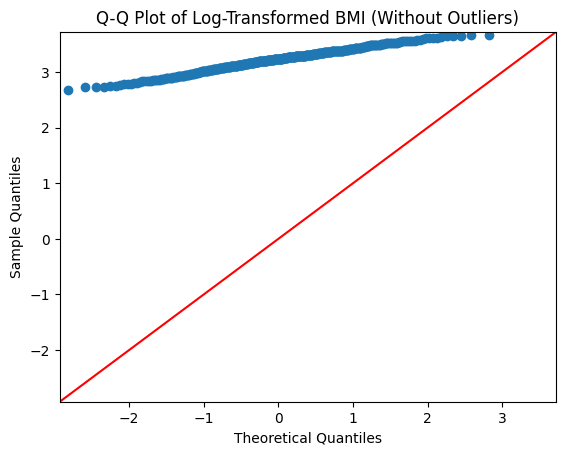

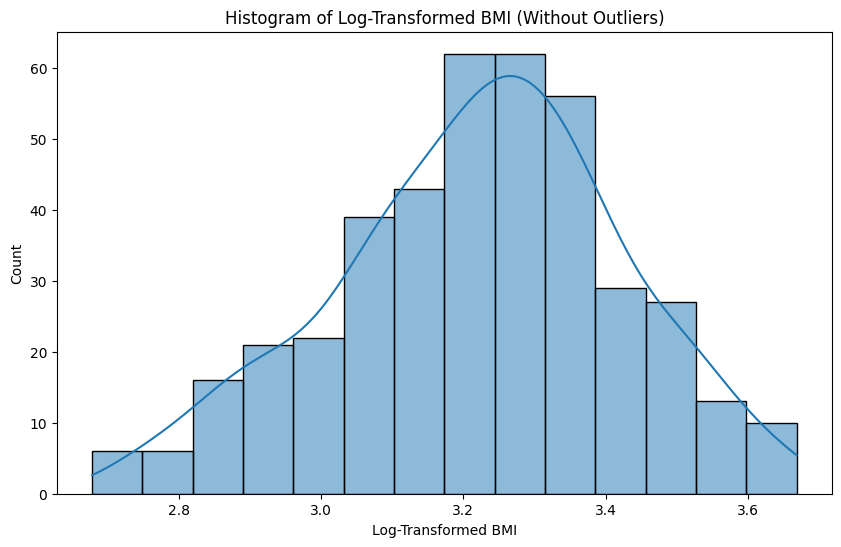

In [50]:
# Plot a Q-Q plot for the log-transformed BMI data without outliers
plt.figure(figsize=(10,6))
sm.qqplot(data_no_outliers['BMI_log'], line='45')
plt.title('Q-Q Plot of Log-Transformed BMI (Without Outliers)')
plt.show()

# Plot a histogram for the log-transformed BMI data without outliers
plt.figure(figsize=(10,6))
sns.histplot(data_no_outliers['BMI_log'], kde=True)
plt.title('Histogram of Log-Transformed BMI (Without Outliers)')
plt.xlabel('Log-Transformed BMI')
plt.show()


We can now fit the two-way ANOVA model on the log-transformed BMI data without outliers

In [51]:
# Fit the two-way ANOVA model on the log-transformed BMI data without outliers
model_log_no_outliers = ols('BMI_log ~ C(AGE_GR) + C(EDU) + C(AGE_GR):C(EDU)', data=data_no_outliers).fit()

# Perform two-way ANOVA
anova_results_log_no_outliers = sm.stats.anova_lm(model_log_no_outliers, typ=2)
anova_results_log_no_outliers


,sum_sq,df,F,PR(>F)
C(AGE_GR),0.940577,2.0,12.355315,0.000006
C(EDU),0.062380,2.0,0.819412,0.441425
C(AGE_GR):C(EDU),0.305806,4.0,2.008516,0.092514
Residual,15.301594,402.0,NaN,NaN
